In [1]:
import pandas as pd
import nltk
from nltk import *
import nltk.sentiment

//anaconda/envs/py35/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## WORD CLOUDS 

In [2]:
emails_df = pd.read_csv('Emails.csv', index_col='Id')

In [3]:
emails_df.shape

(7945, 21)

### Cleaning 

In [4]:
emails_df.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [5]:
emails_df.ExtractedBodyText.isnull().value_counts()

False    6742
True     1203
Name: ExtractedBodyText, dtype: int64

In [6]:
emails_df.RawText.isnull().value_counts()

False    7945
Name: RawText, dtype: int64

#### ExtractedBodyText is not very dependable as shown here: 

In [7]:
print(emails_df.ExtractedBodyText[1])

nan


In [8]:
print(emails_df.RawText[1])

UNCLASSIFIED
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739545
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.
RELEASE IN FULL
From: Sullivan, Jacob J <Sullivan11@state.gov>
Sent: Wednesday, September 12, 2012 10:16 AM
To:
Subject: FW: Wow
From: Brose, Christian (Armed Services) (mailto:Christian_Brose@armed-servic,essenate.govi
Sent: Wednesday, September 12, 2012 10:09 AM
To: Sullivan, Jacob J
Subject: Wow
What a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me
too
UNCLASSIFIED
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739545
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045247



#### Extracting the raw emails manually  

In [9]:
emails_raw =  emails_df.RawText.str.cat(sep = '\n')

In [10]:
email_lines = emails_raw.splitlines()

In [11]:
len(email_lines)

348419

In [12]:
len(set(email_lines))

169541

In [13]:
email_lines = list(set(email_lines))
email_lines

['',
 'positive results. The Oslo accords were a real step toward peace, not another',
 'No — unfortunately —',
 "Clinton's remarks.",
 'Sent: Wednesday, January 20, 2010 6:24 AM',
 'UNCLASSIFIED U.S. Department of State Case No. F-2014-20439 Doc No. C05767166 Date: 08/31/2015',
 'government spokesman, was made after repeated calls by senior U.S. officials for more Arab support to help build',
 'Sent: Thursday, January 14, 2010 4:18 AM',
 'trilogy. Linking these three issues thematically, we can explain how and why foreign policy challenges and solutions',
 'Internet to defend freedom of expression, this kind of repression would be much more difficult. I am not talking about',
 'just before Mr. Gates issued his warning, the chairman of the Joint Chiefs of Staff, Adm. Mike Mullen, wrote an official',
 'If there is a caveat to the depiction of the Obama administration as White House-centric, it is in the alliance between',
 'seems that our best exit strategy would be to take down the top

In [14]:
## We now try to extract as much sensible text as possible.
## To do so, we first get rid of the recurrent headers and metadata fields.

undesired = ['STATE DEPT. -','UNCLASSIFIED','From:','To:','Sent:','Doc No.','Case No.','Date:',\
             'RELEASE IN','PART ','Attachments:','For:','SUBJECT TO AGREEMENT ON SENSITIVE','',\
             'U.S. Department of State','Fw:','Fwd:','----- Original Message','B6','Re:','Cc:',\
             'Bcc', 'Subject:', 'RE:', 'FW:']


for line in email_lines:
    if(any(undes in line for undes in undesired)):
        email_lines.remove(line)
                

In [15]:
len(email_lines)

84770

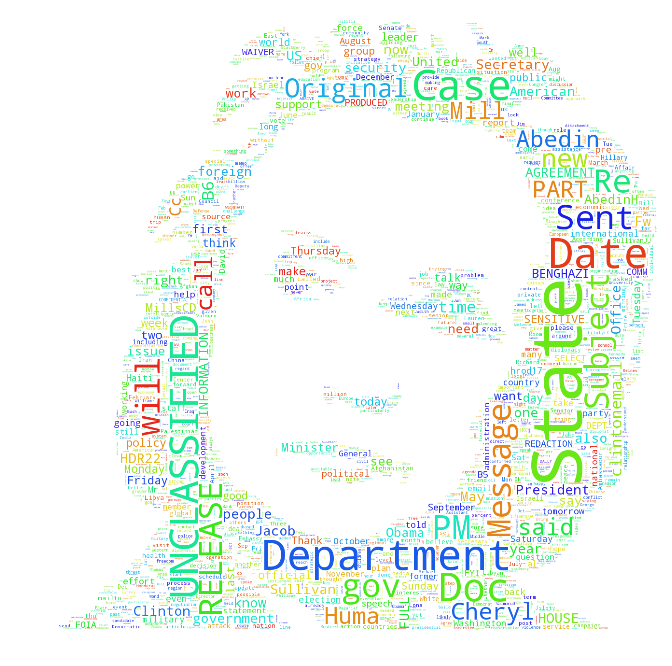

In [16]:
## Let us first create a raw corpus word cloud.

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# The whole text.
text = emails_raw

# read the mask image
hilary_mask = np.array(Image.open('mask.png'))

stopwords = set(STOPWORDS)
#stopwords.add("said")

wc = WordCloud(background_color="white", max_words=20000, mask=hilary_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file('Raw_cloud.png')

# show
plt.figure(figsize = (8,8))
plt.imshow(wc,cmap=plt.cm.gray )
plt.axis("off")
plt.show()

In [17]:
emails = ""
for line in email_lines:
    emails = emails + line + '\n'

In [18]:
## We tokenize and remove english stopwords
clean_email_words = list(set(nltk.word_tokenize(emails)) - set(nltk.corpus.stopwords.words('english')))

stemmed_email_words = ""
for word in clean_email_words:
    stemmed_email_words = stemmed_email_words + SnowballStemmer("english").stem(word) + '\n'

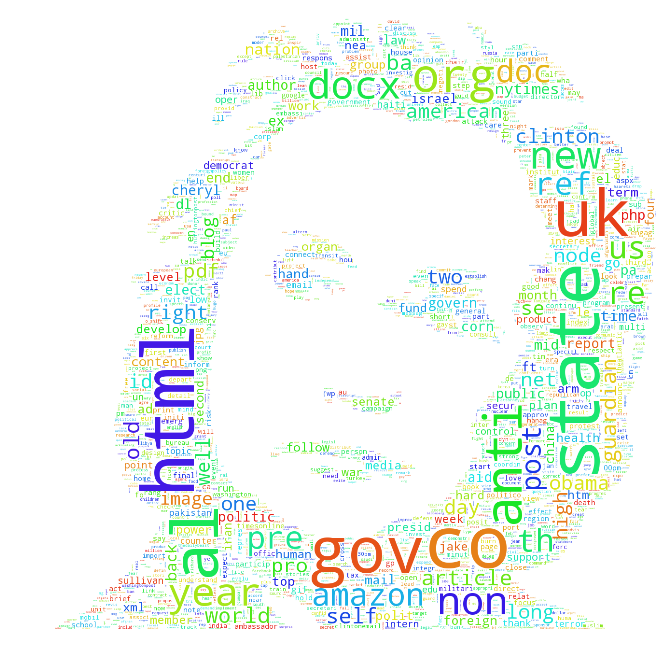

In [19]:
wc1 = WordCloud(background_color="white", max_words=20000, mask=hilary_mask,
               stopwords=stopwords)
# generate word cloud
wc1.generate(stemmed_email_words)

# store to file
wc1.to_file('Clean_cloud.png')

# show
plt.figure(figsize = (8,8))
plt.imshow(wc1, cmap=plt.cm.gray )
plt.axis("off")
plt.show()

In [20]:
## Yes there is a considerable difference, as the stopwords and the undesired words 
## (Subject Case Date etc) are removed and we have a cloud that represents the real 
## content of the messages, which is the purpose of the visualisation.

In [21]:
import pycountry

In [22]:
## Finding mentions of countries

In [23]:
countries_by_name = []

for word in clean_email_words:
    try:
        countries_by_name.append(pycountry.countries.get(name = word))
    except:
        pass

In [24]:
countries_by_name = list(set(countries_by_name))

In [25]:
len(countries_by_name)

134

### Checking for false negatives  

In [26]:
countries_by_a2 = []

for word in clean_email_words:
    try:
        countries_by_a2.append(pycountry.countries.get(alpha_2 = word))
    except:
        pass
    
countries_by_a2 = list(set(countries_by_a2)) 
len(countries_by_a2)


121

In [27]:
countries_by_a3 = []
for word in clean_email_words:
    try:
        countries_by_a3.append(pycountry.countries.get(alpha_3 = word))
    except:
        pass
countries_by_a3 = list(set(countries_by_a3)) 
len(countries_by_a3)    

30

In [28]:
pot_false_neg = []
pot_false_neg = pot_false_neg + list(set(countries_by_a2) - set(countries_by_name))
pot_false_neg = pot_false_neg + list(set(countries_by_a3) - set(countries_by_name))

pot_false_neg = list(set(pot_false_neg))

In [29]:
len(pot_false_neg)

60

In [30]:
pot_false_neg

[Country(alpha_2='CV', alpha_3='CPV', name='Cabo Verde', numeric='132', official_name='Republic of Cabo Verde'),
 Country(alpha_2='CD', alpha_3='COD', name='Congo, The Democratic Republic of the', numeric='180'),
 Country(alpha_2='RU', alpha_3='RUS', name='Russian Federation', numeric='643'),
 Country(alpha_2='MU', alpha_3='MUS', name='Mauritius', numeric='480', official_name='Republic of Mauritius'),
 Country(alpha_2='SL', alpha_3='SLE', name='Sierra Leone', numeric='694', official_name='Republic of Sierra Leone'),
 Country(alpha_2='VA', alpha_3='VAT', name='Holy See (Vatican City State)', numeric='336'),
 Country(alpha_2='PR', alpha_3='PRI', name='Puerto Rico', numeric='630'),
 Country(alpha_2='IO', alpha_3='IOT', name='British Indian Ocean Territory', numeric='086'),
 Country(alpha_2='RE', alpha_3='REU', name='Réunion', numeric='638'),
 Country(alpha_2='KM', alpha_3='COM', name='Comoros', numeric='174', official_name='Union of the Comoros'),
 Country(alpha_2='BJ', alpha_3='BEN', nam

In [31]:
'(Vatican City State)'.strip('(').strip(')').split(' ')

['Vatican', 'City', 'State']

In [32]:
'Norfolk' in clean_email_words

True

In [33]:
false_neg_countries = []

for country in pot_false_neg:
    country_words = country.name.strip('(').strip(')').split()
    for word in country_words:
        if word in clean_email_words:
            false_neg_countries.append(country)
            
false_neg_countries = list(set(false_neg_countries))

In [34]:
print(len(false_neg_countries))
false_neg_countries

45


[Country(alpha_2='CV', alpha_3='CPV', name='Cabo Verde', numeric='132', official_name='Republic of Cabo Verde'),
 Country(alpha_2='CD', alpha_3='COD', name='Congo, The Democratic Republic of the', numeric='180'),
 Country(alpha_2='RU', alpha_3='RUS', name='Russian Federation', numeric='643'),
 Country(alpha_2='SL', alpha_3='SLE', name='Sierra Leone', numeric='694', official_name='Republic of Sierra Leone'),
 Country(alpha_2='VA', alpha_3='VAT', name='Holy See (Vatican City State)', numeric='336'),
 Country(alpha_2='IO', alpha_3='IOT', name='British Indian Ocean Territory', numeric='086'),
 Country(alpha_2='PR', alpha_3='PRI', name='Puerto Rico', numeric='630'),
 Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland'),
 Country(alpha_2='HM', alpha_3='HMD', name='Heard Island and McDonald Islands', numeric='334'),
 Country(alpha_2='NF', alpha_3='NFK', name='Norfolk Island', numeric='574'),
 Country(a

In [35]:
## Time for a manual check, 45 samples in my opinion is ok 
## We see already that the problem arises from alpha_2 codes like LA, CC, CV, IM etc.
## Which are common acronyms
## Dominican Republic is a tricky one as the Dominican could mean the religious group.

In [36]:
bad_codes = ['HM','KY','LA','VI','VC','CV','LC','SJ','UM','SM','CC','PM','GF','IM','FO','GS','MP','NC','MF', 'IO']

for code in bad_codes:
    country = pycountry.countries.get(alpha_2 = code )
    try:
        false_neg_countries.remove(country)
    except:
        pass

In [37]:
len(false_neg_countries)

27

In [38]:
false_neg_countries

[Country(alpha_2='CD', alpha_3='COD', name='Congo, The Democratic Republic of the', numeric='180'),
 Country(alpha_2='RU', alpha_3='RUS', name='Russian Federation', numeric='643'),
 Country(alpha_2='SL', alpha_3='SLE', name='Sierra Leone', numeric='694', official_name='Republic of Sierra Leone'),
 Country(alpha_2='VA', alpha_3='VAT', name='Holy See (Vatican City State)', numeric='336'),
 Country(alpha_2='PR', alpha_3='PRI', name='Puerto Rico', numeric='630'),
 Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland'),
 Country(alpha_2='NF', alpha_3='NFK', name='Norfolk Island', numeric='574'),
 Country(alpha_2='HK', alpha_3='HKG', name='Hong Kong', numeric='344', official_name='Hong Kong Special Administrative Region of China'),
 Country(alpha_2='MD', alpha_3='MDA', common_name='Moldova', name='Moldova, Republic of', numeric='498', official_name='Republic of Moldova'),
 Country(alpha_2='CI', alpha_3=

In [39]:
countries_by_name = countries_by_name + false_neg_countries
len(countries_by_name)

161

In [40]:
ref_countries = []
ref_countries = ref_countries + list(country.name.split(',')[0] for country in countries_by_name)

In [41]:
ref_countries

['Guinea-Bissau',
 'Hungary',
 'Algeria',
 'Luxembourg',
 'Kyrgyzstan',
 'Brazil',
 'Lithuania',
 'Georgia',
 'Lesotho',
 'Haiti',
 'Andorra',
 'Canada',
 'Jamaica',
 'Bahamas',
 'Gabon',
 'Guinea',
 'Colombia',
 'Azerbaijan',
 'Gambia',
 'Maldives',
 'Finland',
 'Belarus',
 'Japan',
 'Belgium',
 'Mexico',
 'Bulgaria',
 'Madagascar',
 'Argentina',
 'Kazakhstan',
 'Egypt',
 'Burundi',
 'Iceland',
 'Bermuda',
 'Libya',
 'France',
 'Liberia',
 'Armenia',
 'Kenya',
 'Barbados',
 'Croatia',
 'Congo',
 'Ghana',
 'Guatemala',
 'Guyana',
 'Bahrain',
 'Guam',
 'Angola',
 'Jersey',
 'Austria',
 'Cameroon',
 'Lebanon',
 'Spain',
 'Italy',
 'Antarctica',
 'Afghanistan',
 'Cuba',
 'Cambodia',
 'Mali',
 'Morocco',
 'Israel',
 'Cyprus',
 'Estonia',
 'Monaco',
 'Ethiopia',
 'Indonesia',
 'China',
 'Botswana',
 'Bangladesh',
 'Greece',
 'Denmark',
 'Switzerland',
 'Kuwait',
 'Chile',
 'Honduras',
 'Latvia',
 'Germany',
 'Ireland',
 'Bhutan',
 'Australia',
 'Iraq',
 'Ecuador',
 'Jordan',
 'Gibraltar',
 

In [42]:
ref_lines = {}
for ref_country in ref_countries:
    ref_lines[ref_country] = ''.join(list((line + '\n') for line in email_lines if (ref_country in line)))

In [43]:
for country in ref_lines.keys():
    ref_lines[country] = re.sub('<.*>', '', ref_lines[country])
    ref_lines[country]  = re.sub('[0-9]*', '', ref_lines[country])
    ref_lines[country] = re.sub('[^\w\s]', '', ref_lines[country])
    ref_lines[country] = ref_lines[country].lower()
    

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [45]:
ref_sentiments = {}
for country in ref_lines.keys():
    ref_sentiments[country] = vader_analyzer.polarity_scores(ref_lines[country]) 

In [46]:
sentiments = pd.DataFrame.from_dict(ref_sentiments, 'index')

In [47]:
sentiments.head()

,neg,pos,neu,compound
Afghanistan,0.108,0.092,0.801,-0.9995
Algeria,0.058,0.104,0.838,0.7096
American Samoa,0.000,0.099,0.901,0.5423
Andorra,0.168,0.000,0.832,-0.8591
Angola,0.020,0.133,0.847,0.9931


In [48]:
sentiments.reset_index(inplace = True)

In [49]:
sentiments.sort('compound', inplace=True)
sentiments['Weight'] = sentiments['index'].apply(lambda x : len(ref_lines[x]))

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [50]:
minw = min(sentiments.Weight)
maxw = max(sentiments.Weight)
sentiments.Weight = sentiments.Weight.apply(lambda x: x  / (maxw - minw))

In [51]:
sentiments.set_index('index', inplace=True)

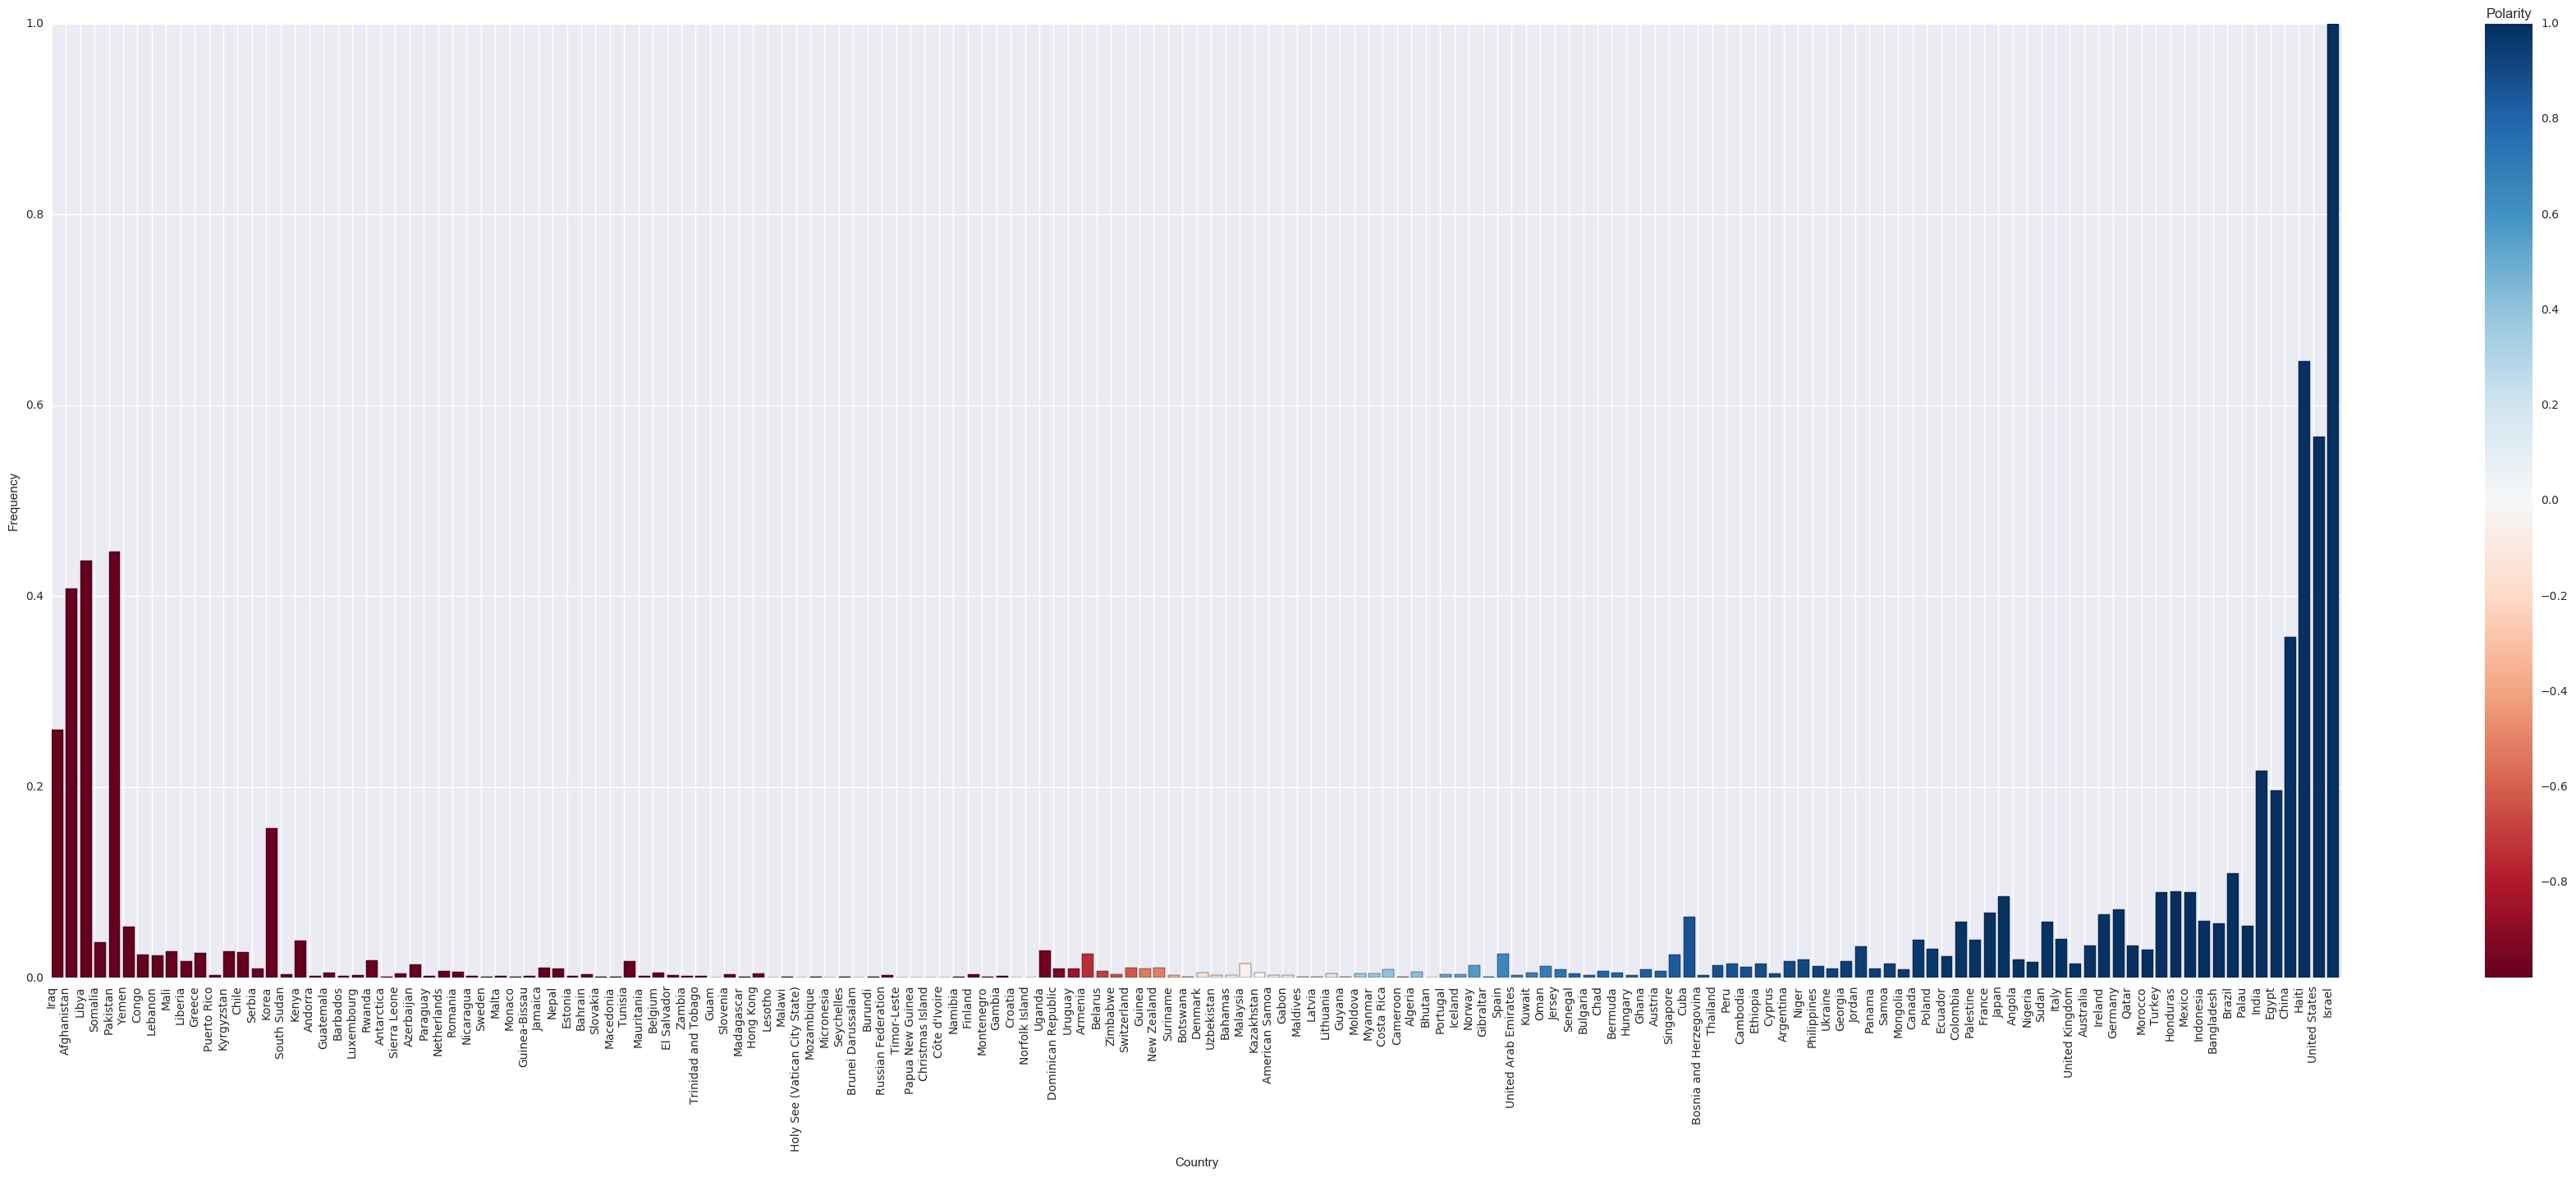

In [52]:
import seaborn as sb
sb.set_context(rc={"figure.figsize": (45, 15)})
from matplotlib import cm
y = np.array(sentiments['compound'])
colors = cm.RdBu(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdBu')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Polarity")
plt.bar(range(sentiments.shape[0]), sentiments['Weight'], tick_label = sentiments.index, color=colors)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

## TOPIC MODELLING
### It is interesting, given that we seperated the emails by country to tr a topic modelling to see what each country is talking about.
### We simply asked for as many topics as there are countries as we saw little improvement to the results.


In [60]:
import gensim

In [54]:
from gensim import models, corpora , similarities

In [55]:
doc = []
for country in ref_lines.keys():
    doc.append(list(set(ref_lines[country].split()) - stopwords))

In [56]:
dictionary = corpora.Dictionary(doc)
corpus = [dictionary.doc2bow(text) for text in doc]

In [58]:
lda = models.ldamodel.LdaModel(corpus, id2word = dictionary, num_topics= 152, passes = 5)

In [59]:
lda.print_topics(152)

[(0,
  '0.009*"shouldntdespite" + 0.004*"exiled" + 0.004*"handled" + 0.002*"solicitude" + 0.002*"rebellion" + 0.001*"shiomo" + 0.000*"emphatic" + 0.000*"yuval" + 0.000*"call" + 0.000*"president"'),
 (1,
  '0.019*"combined" + 0.018*"really" + 0.017*"mid" + 0.014*"wasnt" + 0.012*"bad" + 0.011*"achieved" + 0.011*"mahathir" + 0.011*"harking" + 0.010*"thursday" + 0.009*"arrival"'),
 (2,
  '0.000*"will" + 0.000*"call" + 0.000*"said" + 0.000*"subject" + 0.000*"including" + 0.000*"weapons" + 0.000*"taking" + 0.000*"president" + 0.000*"states" + 0.000*"report"'),
 (3,
  '0.014*"leaving" + 0.011*"dead" + 0.010*"nearby" + 0.009*"islamist" + 0.008*"insisted" + 0.008*"backing" + 0.008*"struggling" + 0.007*"elements" + 0.007*"certain" + 0.007*"overall"'),
 (4,
  '0.011*"vision" + 0.009*"projects" + 0.009*"approve" + 0.009*"hostile" + 0.009*"quoted" + 0.009*"ends" + 0.008*"transition" + 0.008*"lifg" + 0.008*"deserve" + 0.008*"aug"'),
 (5,
  '0.016*"criticism" + 0.012*"allowed" + 0.011*"seeks" + 0.011